In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("Employers_dataset_Hth.csv")

# Question 1 
## What is the gender breakdown in each department?
### Findings: Representation is near-parity in most teams. Engineering is essentially even (about half women, half men). HR and Marketing are also balanced. Finance, Product and Sales lean slightly male (Finance the most).
### Interpretation: No department shows an extreme imbalance. The small male tilts in Finance/Product/Sales suggest mild pipeline or hiring drift rather than structural exclusion.
### Conclusion: Gender representation is broadly healthy across departments, with modest male skews in Finance, Product and Sales worth monitoring.

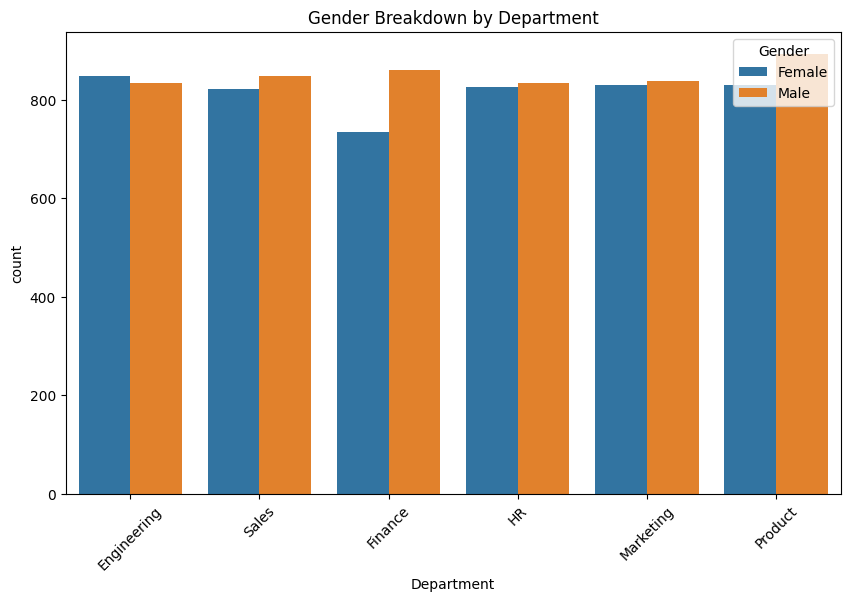

In [29]:
# 1. Gender breakdown in each department
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Department", hue="Gender")
plt.title("Gender Breakdown by Department")
plt.xticks(rotation=45)
plt.show()


# Question 2. 
## How do average salaries compare between men and women across departments?
### Findings: Averages are close in every department. Men are higher in Engineering, Finance, HR and Marketing (Marketing shows the largest male premium). Women are higher in Product and Sales (Sales shows the largest female premium).
### Interpretation: The direction of the gap flips by department, and the sizes are small. That pattern fits normal role-mix effects and local pay bands more than systematic bias.
### Conclusion: No consistent company-wide pay gap by gender at the department level; continue to sanity-check outliers (especially Marketing and Sales) during merit cycles.

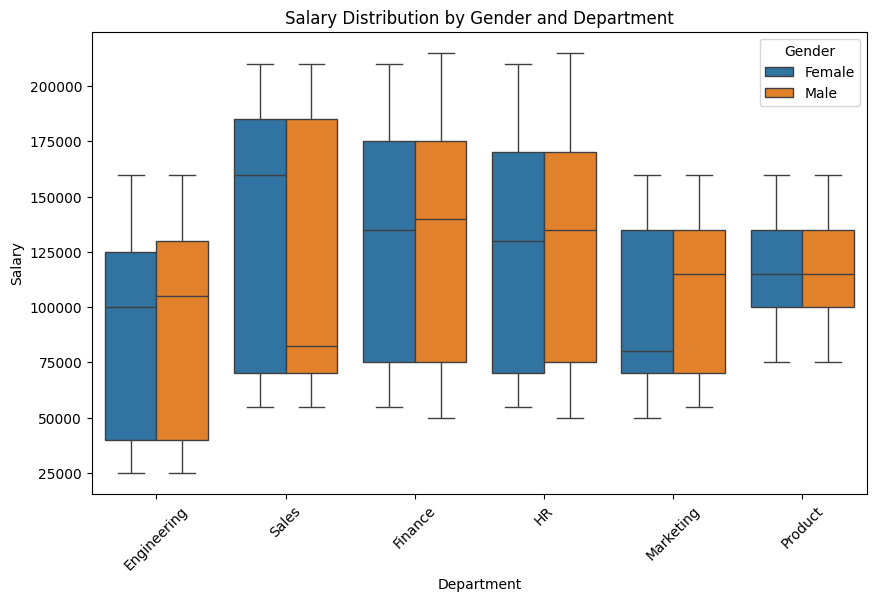

In [39]:
# 2. Average salaries by gender and department
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Department", y="Salary", hue="Gender")
plt.title("Salary Distribution by Gender and Department")
plt.xticks(rotation=45)
plt.show()




# Question 3 
## What is the distribution of education levels for men versus women?
### Findings: Both groups are concentrated at Master’s, followed by Bachelor’s, then PhD. Men have slightly higher absolute counts at Master’s/PhD, but the shape of the distribution is nearly identical across genders.
### Interpretation: Education mix is not materially different by gender, so education is unlikely to explain any residual pay differences.
### Conclusion: Education levels are well matched between men and women.

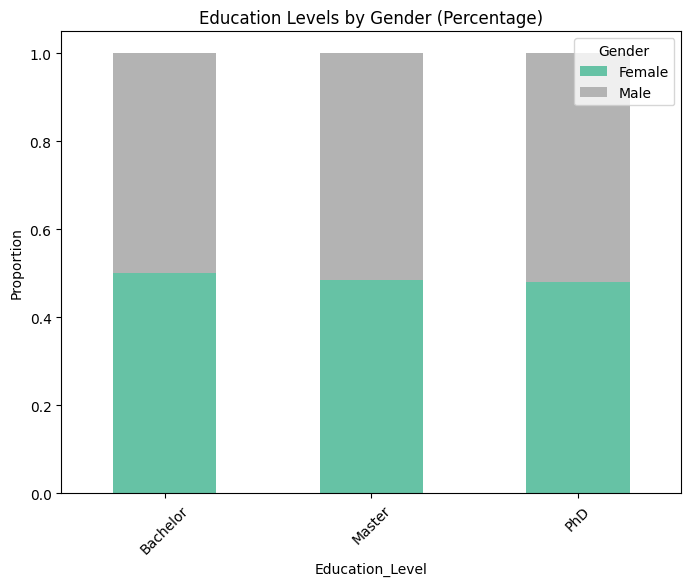

In [42]:
# 3. Education distribution by gender
edu_pct = df.groupby('Education_Level')['Gender'].value_counts(normalize=True).unstack()
edu_pct.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Set2')
plt.title("Education Levels by Gender (Percentage)")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()




# Question 4 
## How do years of experience compare between men and women?
### Findings: Average experience is almost the same (men ≈12.5 years; women ≈12.2 years).
### Interpretation: Experience does not differ enough by gender to drive pay or level gaps.
### Conclusion: Experience is effectively equal across genders in data.



/var/folders/n6/ql6fbn153md9xysk8wtz_42m0000gn/T/ipykernel_86110/1112956978.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Gender", y="Experience_Years", palette=['#6B5B95','#FF6F61'])


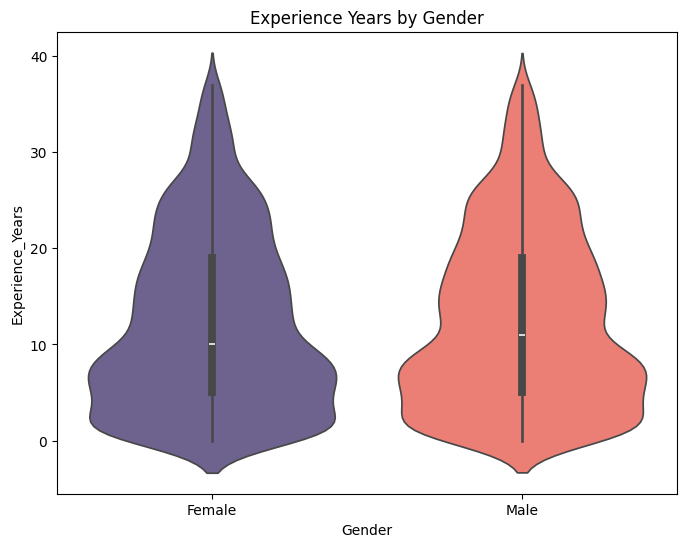

In [67]:

# 4. Years of experience comparison

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x="Gender", y="Experience_Years", palette=['#6B5B95','#FF6F61'])
plt.title("Experience Years by Gender")
plt.show()



# Question 5 
## How does age distribution differ between men and women?
### Findings: Mean age is nearly identical (men ≈35.6; women ≈35.3).
### Interpretation: Workforce seniority is balanced; age is not a hidden driver of other outcomes.
### Conclusion: Not a huge age difference by gender.



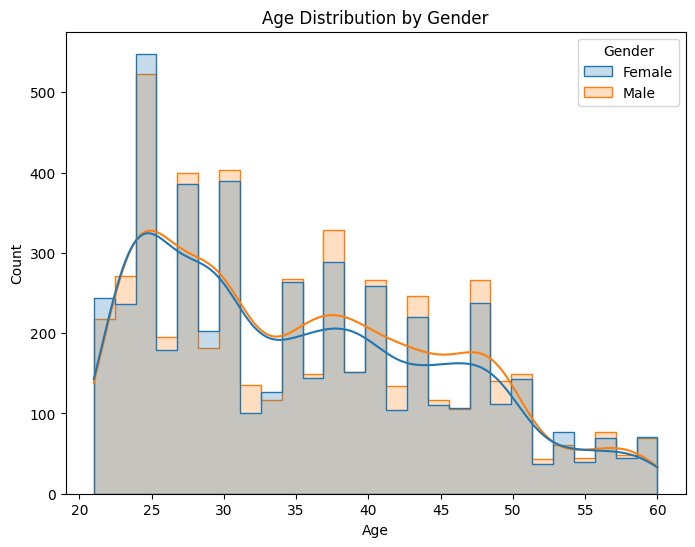

In [33]:
# 5. Age distribution by gender
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="Age", hue="Gender", kde=True, element="step")
plt.title("Age Distribution by Gender")
plt.show()

# Question 6 
## What are the most common job titles held by men and women?
### Findings: The top titles are the same for both groups—Manager and Analyst are the largest, followed by Executive, Engineer, then Intern. Counts are very close by gender.
### Interpretation: Title mix is shared, which supports fair access to common roles and ladders.
### Conclusion: Men and women hold similar roles at similar frequencies; promotion pipelines should therefore be comparable if processes remain consistent.



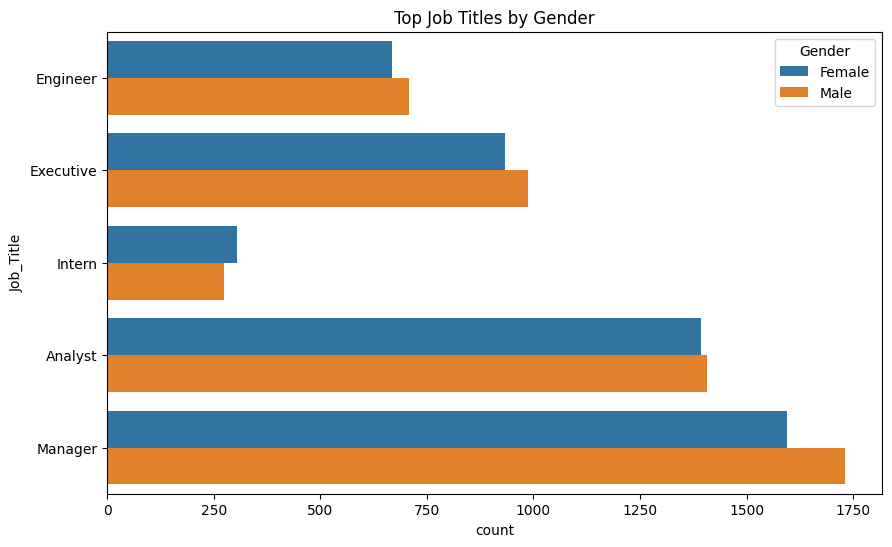

In [ ]:
# 6. Most common job titles by gender 
plt.figure(figsize=(10,6))
top_jobs = df['Job_Title'].value_counts().head(10).index
sns.countplot(data=df[df['Job_Title'].isin(top_jobs)], y="Job_Title", hue="Gender")
plt.title("Top Job Titles by Gender")
plt.show()

# Question 7
## Is there a salary difference between men and women within the same job title?
### Findings: Within-title average pay is very close. Small gaps favour men for Manager and Analyst, and favour women for Engineer, Executive and Intern. All differences are modest.
### Interpretation: When comparing like-for-like titles, pay equity looks good with only minor variances that could come from tenure, niche skills or locale.
### Conclusion: Within the same job title, pay is essentially gender-neutral; there are slight ups and downs.


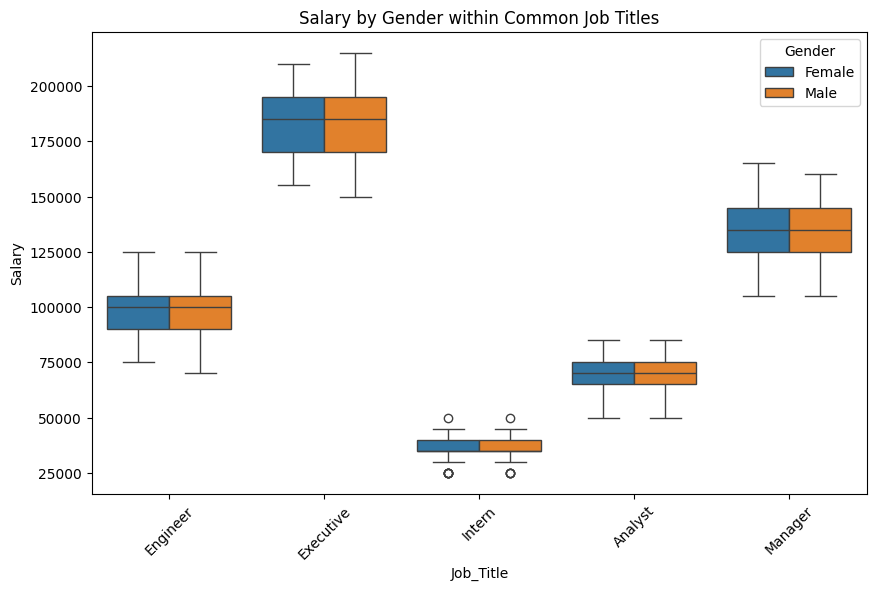

In [62]:
# 7. Salary difference within job titles
plt.figure(figsize=(10,6))
common_titles = df['Job_Title'].value_counts().head(5).index
sns.boxplot(data=df[df['Job_Title'].isin(common_titles)], x="Job_Title", y="Salary", hue="Gender")
plt.title("Salary by Gender within Common Job Titles")
plt.xticks(rotation=45)
plt.show()


# Question 8
## How does salary vary with education level for men and women?
### Findings: Pay increases from Bachelor’s to Master’s to PhD for both genders. At Bachelor’s and Master’s, men are very slightly higher on average; at PhD, women are slightly higher.
### Interpretation: Education level—not gender—is the main driver of salary differences here. The tiny gender gaps at each level are not uniform and stay small.
### Conclusion: Salary tracks education consistently, with negligible gender effect once education is controlled.



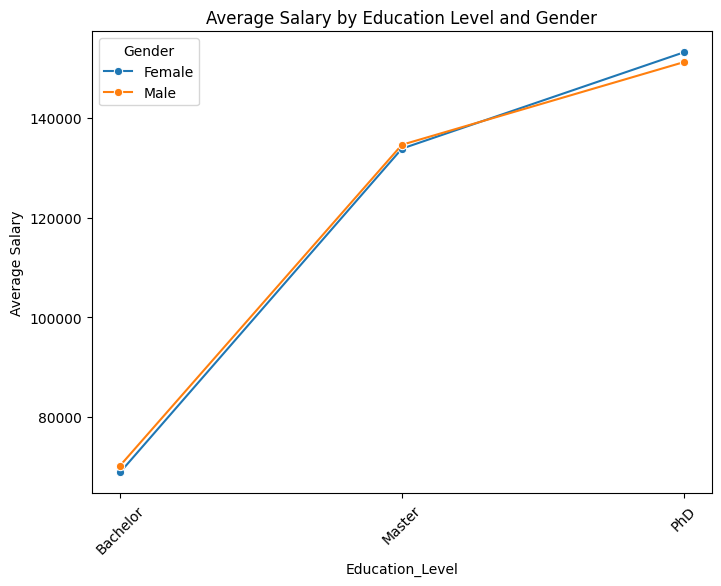

In [68]:
# 8. Salary vs education level by gender
plt.figure(figsize=(8,6))
avg_salary = df.groupby(["Education_Level", "Gender"])["Salary"].mean().reset_index()
sns.lineplot(data=avg_salary, x="Education_Level", y="Salary", hue="Gender", marker="o")
plt.title("Average Salary by Education Level and Gender")
plt.xticks(rotation=45)
plt.ylabel("Average Salary")
plt.show()


# Question 9
## What is the gender distribution across different locations?
### Findings: Most sites are near 50/50. Seattle is almost perfectly even; Austin is very slightly female-leaning; San Francisco and especially New York lean a bit male.
### Interpretation: Any location effects are mild. New York’s tilt may reflect local talent pools or team mix (e.g., Finance presence).
### Conclusion: Locations are largely balanced.


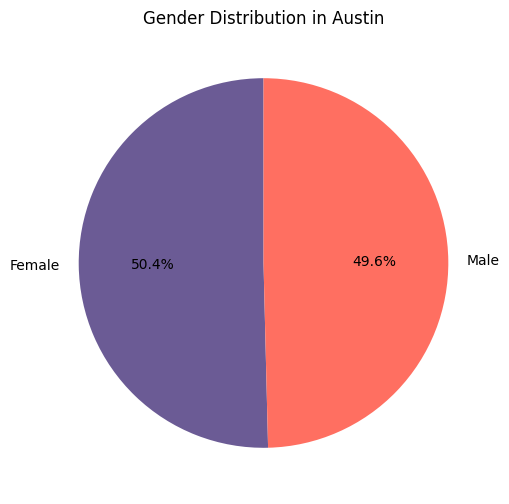

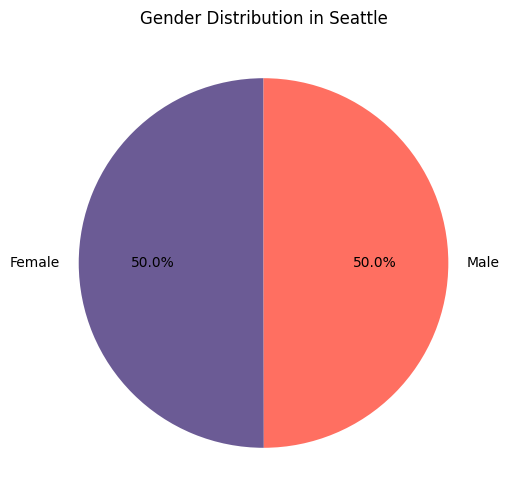

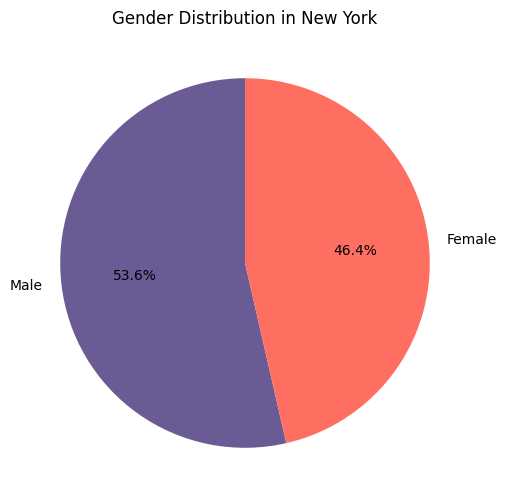

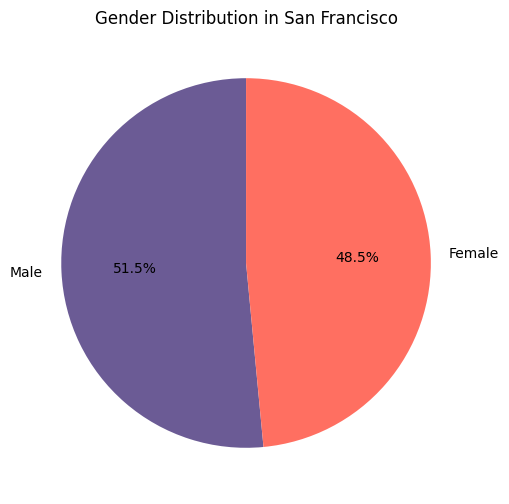

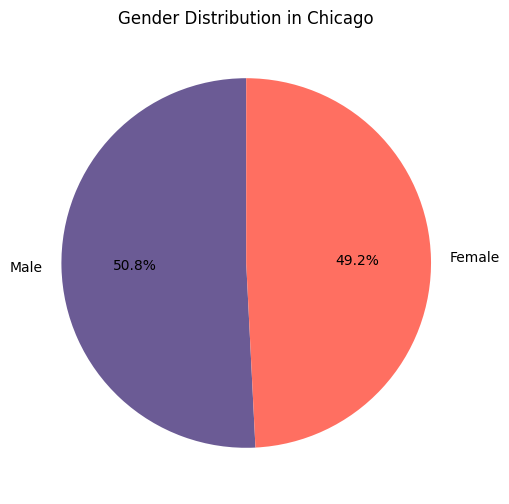

In [61]:
# 9. Gender distribution across locations
locations = df['Location'].unique()
for loc in locations:
    loc_counts = df[df['Location']==loc]['Gender'].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(loc_counts, labels=loc_counts.index, autopct='%1.1f%%', colors=['#6B5B95','#FF6F61'], startangle=90)
    plt.title(f"Gender Distribution in {loc}")
    plt.show()




# Question 10 
## How does average experience differ by gender within each department?
### When we break down average experience by gender within departments, patterns of retention and advancement appear. 
### Findings: Differences are small and mixed. Men have marginally more experience in Engineering, Finance, HR and Marketing; women are slightly higher in Product and Sales. The gaps are typically under a year.
### Interpretation: These tiny differences won’t meaningfully impact pay bands or promotion timing on their own.
### Conclusion: Experience is effectively balanced by gender within departments


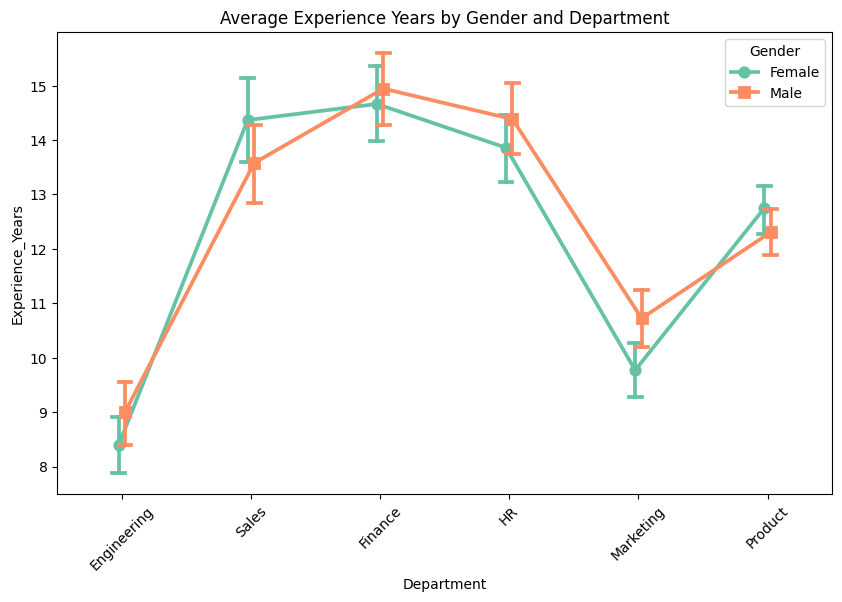

In [56]:
# 10. Average experience by gender and department
plt.figure(figsize=(10,6))
sns.pointplot(
    data=df, 
    x="Department", 
    y="Experience_Years", 
    hue="Gender", 
    dodge=True, 
    markers=["o","s"], 
    capsize=.1, 
    palette="Set2"
)
plt.title("Average Experience Years by Gender and Department")
plt.xticks(rotation=45)
plt.show()



# The data shows that, across departments, men and women in this company are represented almost equally, with only slight male skews in Finance, Product, and Sales. In STEM-related fields such as Engineering, the gender balance is particularly close to even, challenging the stereotype that women are absent from technical spaces. Education, experience, and age are nearly identical across genders, which means women are entering with the same qualifications and staying just as long as men.

# When it comes to salaries, the gaps that exist are small and inconsistent: sometimes men earn more, sometimes women do. Within the same job title, pay is nearly identical, which suggests that explicit salary discrimination is not widespread here. Instead, the subtler bias shows up in patterns, for example, Finance and Product (fields closely linked to STEM and leadership) tilt male, and in Marketing men are paid noticeably more. Women’s higher averages in Sales and at the PhD level show that when barriers are lowered, women can even outpace men.


# Final thought: The data challenges the idea that women “don’t belong” in STEM by showing they are equally qualified and successful. Yet, the small, uneven gaps remind us that gender bias doesn’t vanish on its own; it must be continually addressed through conscious practices, especially in STEM departments where women’s representation has historically been questioned.